In [13]:
#!pip install PyPDF2
import urllib.request
import PyPDF2

In [20]:
# ref: https://www.codegrepper.com/code-examples/python/download+pdf+from+link+using+python
pdf_path = "https://www.danieljaduepresidente.cl/wp-content/uploads/2021/06/Programa-DJ.pdf"
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()
 
download_file(pdf_path, "Porgrama_DJ")

In [ ]:
corpus = []
for i in range(pdj.numPages):
    page = pdj.getPage(i)
    print(page.extractText())
    if i == 5:
        break

# Data

https://pdftotext.com/es/

In [26]:
import nltk
import pandas as pd
from collections import Counter
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize


#!python -m spacy download es
import spacy
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
#pd.set_option(\"display.precision\", 2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
with open('Programa-DJ.txt', encoding = 'utf-8') as f:
    lines = f.readlines()

In [4]:
from random import sample
print('Algunas lineas: ', sample(lines, 3))

Algunas lineas:  ['y hacia Chile\n', '\n', '\n']


In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
tokenizer = get_tokenizer("spacy", "es")
nlp = spacy.load('es')
punctuation = string.punctuation + '\na'
stopwords = pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt').values
tokens = []
for line in lines:
    tokens_ = tokenizer(line)
    for token in tokens_:
        token = token.lower()
        if token not in punctuation and token not in stopwords:
            tokens.append(token)

#tokens = [word.lower() for word in word_tokenize(line) for line in lines if word.lower() not in punctuation]

In [23]:
print('Cantidad de tokens', len(tokens))
print('Algunos tokens: ', sample(tokens, 5))

Cantidad de tokens 25128
Algunos tokens:  ['modelo', 'altos', 'productos', 'exportaciones', 'integrada']


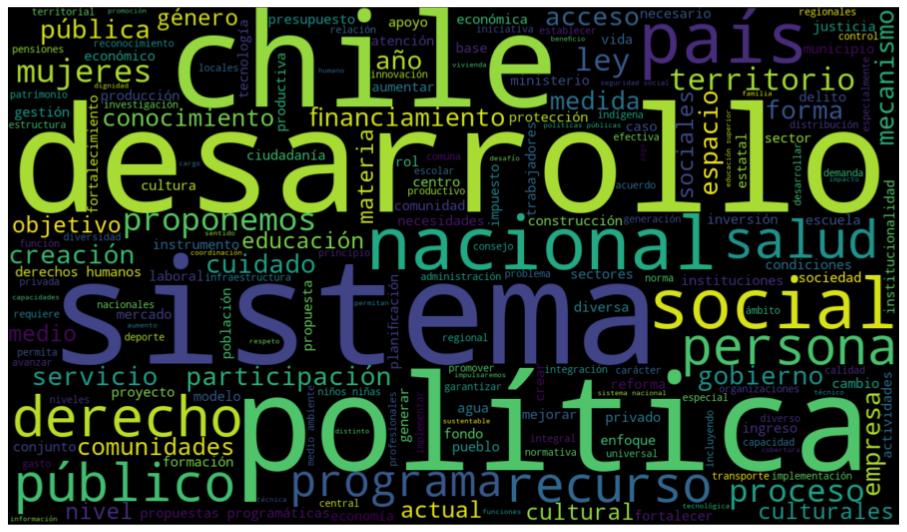

<Figure size 1152x1152 with 0 Axes>

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (16,16)

# Generate a word cloud image
text = " ".join(tokens)
wordcloud = WordCloud(width = 1240, height = 720, background_color="black")

# Generamos el wordcloud
wordcloud.generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.figure( figsize=(20,10), facecolor='k')
plt.show()
#plt.savefig("most_common_pdj.png")

In [51]:
import numpy as np
from PIL import Image

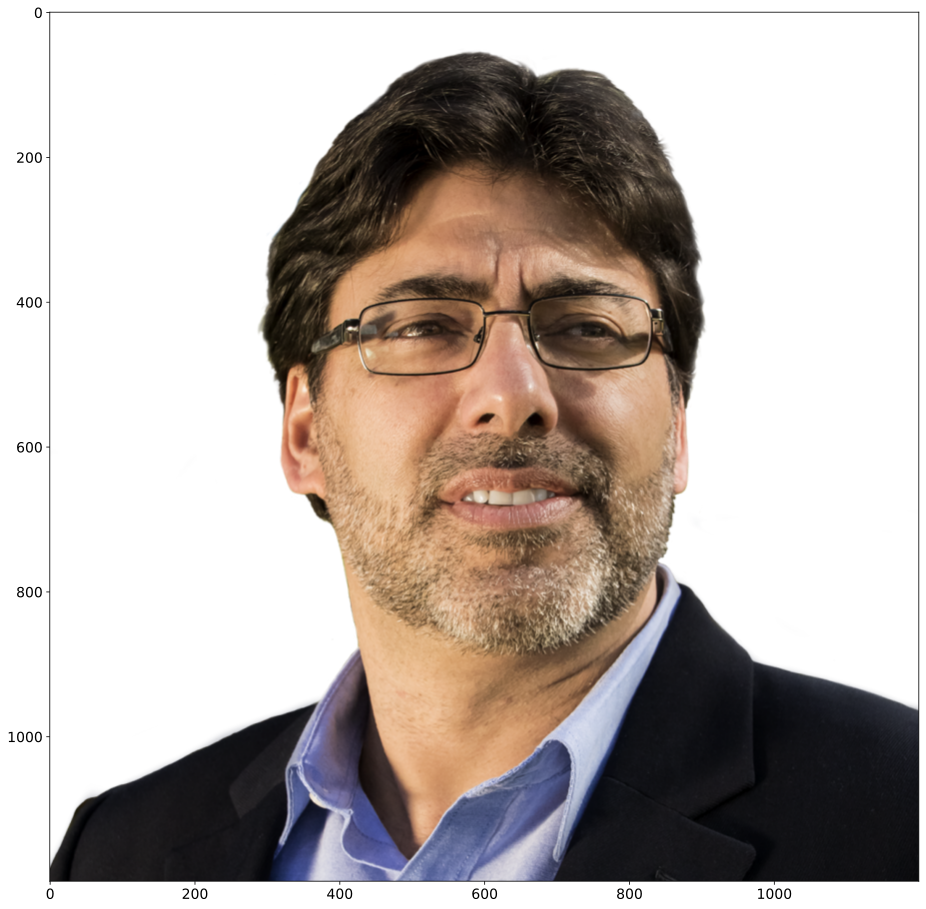

In [307]:
jadue_img = np.array(Image.open("daniel-jadue.png"))
plt.imshow(jadue_img)

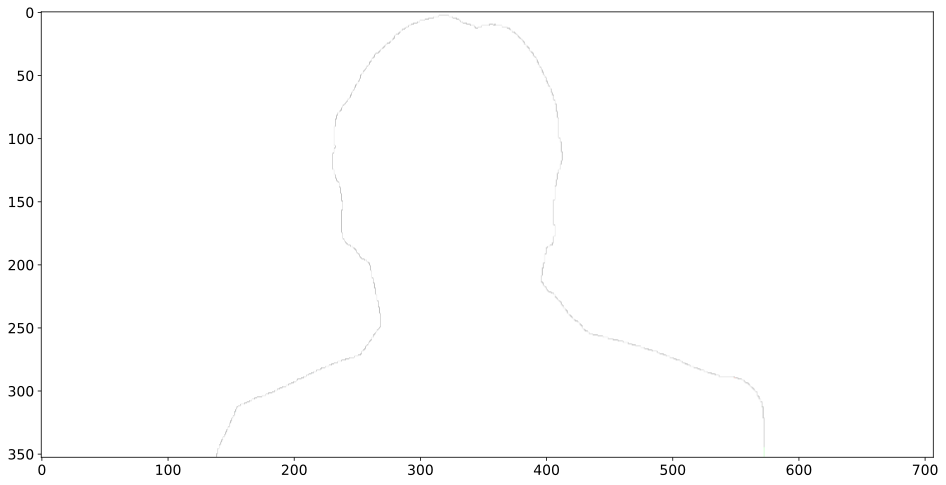

In [308]:
transformed_mask_jadue= jadue.flatten()
for i,v in enumerate(transformed_mask_jadue):
    if v==0:
        transformed_mask_jadue[i]=255
    else:
        transformed_mask_jadue[i]=0
transformed_mask_jadue = transformed_mask_jadue.reshape(jadue.shape)
plt.imshow(transformed_mask_jadue) 

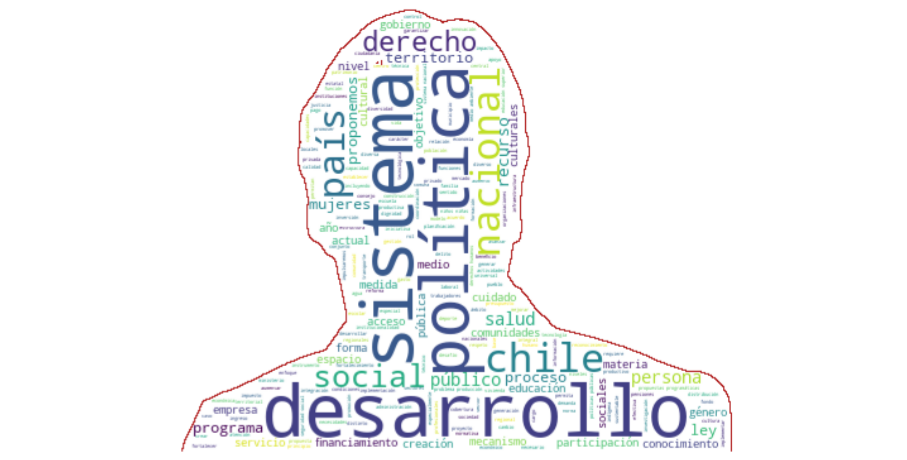

<Figure size 1440x720 with 0 Axes>

In [309]:
wordcloud = WordCloud(width = 1920, height = 1080, background_color="white", mask=transformed_mask_jadue, contour_color='firebrick', contour_width=1)
wordcloud.generate(text)
wordcloud.to_file("jadue_word_cloud.png")
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(20,10), facecolor='w')
plt.show()
#plt.savefig('wordcloud.png', facecolor='w', bbox_inches='tight')